In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:

import keras
from torchsummary import summary
import os
import datasets
import pytorch_models,pytorch_experiment
import torch.optim as optim
import torch
use_cuda=torch.cuda.is_available()

dataset="cifar10"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset)


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')





Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
filters={'mnist':16,'mnist_rot':32,'cifar10':96}

model = pytorch_models.AllGConv(input_shape,num_classes,filters=filters[dataset]//2)

parameters=pytorch_experiment.add_weight_decay(model.named_parameters(),1e-9)
optimizer = optim.Adam(parameters, lr=0.001)

if use_cuda:
    model=model.cuda()
print(model)
#summary(model, input_size=[1,28,28])


AllGConv(
  (conv): Sequential(
    (0): P4ConvZ2()
    (1): ReLU()
    (2): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
    (3): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
    (4): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
    (5): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
    (6): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
    (7): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
    (8): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
  )
  (class_conv): Conv2d(96, 10, kernel_size=(1, 1), stride=(1, 1))
)


In [5]:

rotated_model=pytorch_models.AllGConv(input_shape,num_classes,filters=filters[dataset]//2)
if use_cuda:
    rotated_model= rotated_model.cuda()


rotated_parameters=pytorch_experiment.add_weight_decay(rotated_model.named_parameters(),1e-9)
rotated_optimizer = optim.Adam(rotated_parameters, lr=0.001)

print(rotated_model)
#summary(model, input_size=[1,28,28])



AllGConv(
  (conv): Sequential(
    (0): P4ConvZ2()
    (1): ReLU()
    (2): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
    (3): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
    (4): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
    (5): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
    (6): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
    (7): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
    (8): ConvBNAct(
      (model): Sequential(
        (0): P4ConvP4()
        (1): ReLU()
      )
    )
  )
  (class_conv): Conv2d(96, 10, kernel_size=(1, 1), stride=(1, 1))
)


Training model with unrotated dataset...


Epoch 1: 100% (batch 196/196)  ==stats==> loss:   2.31, accuracy:  0.108, Time:  0:01:58


Test => Loss: 2.2472, Accuracy: 13.09% (1309/10000)


Epoch 2: 100% (batch 196/196)  ==stats==> loss:   2.21, accuracy:  0.173, Time:  0:01:55


Test => Loss: 2.1957, Accuracy: 17.42% (1742/10000)


Epoch 3: 100% (batch 196/196)  ==stats==> loss:   2.18, accuracy:   0.18, Time:  0:01:56


Test => Loss: 2.1839, Accuracy: 18.74% (1874/10000)


Epoch 4: 100% (batch 196/196)  ==stats==> loss:   2.15, accuracy:  0.206, Time:  0:02:18


Test => Loss: 2.0424, Accuracy: 26.88% (2688/10000)


Epoch 5: 100% (batch 196/196)  ==stats==> loss:   1.91, accuracy:  0.319, Time:  0:01:52


Test => Loss: 1.7656, Accuracy: 37.74% (3774/10000)


Epoch 6: 100% (batch 196/196)  ==stats==> loss:   1.66, accuracy:  0.444, Time:  0:01:41


Test => Loss: 1.5440, Accuracy: 49.77% (4977/10000)


Epoch 7: 100% (batch 196/196)  ==stats==> loss:   1.46, accuracy:  0.529, Time:  0:01:40


Test => Loss: 1.4521, Accuracy: 53.40% (5340/10000)


Epoch 8: 100% (batch 196/196)  ==stats==> loss:   1.32, accuracy:  0.576, Time:  0:01:41


Test => Loss: 1.3004, Accuracy: 59.10% (5910/10000)


Epoch 9: 100% (batch 196/196)  ==stats==> loss:   1.17, accuracy:  0.629, Time:  0:01:13


Test => Loss: 1.2360, Accuracy: 61.77% (6177/10000)


Epoch 10: 100% (batch 196/196)  ==stats==> loss:   1.08, accuracy:   0.66, Time:  0:00:45


Test => Loss: 1.1908, Accuracy: 63.58% (6358/10000)


Epoch 11: 100% (batch 196/196)  ==stats==> loss:   1.01, accuracy:  0.686, Time:  0:00:45


Test => Loss: 1.1933, Accuracy: 63.09% (6309/10000)


Epoch 12: 100% (batch 196/196)  ==stats==> loss:  0.947, accuracy:  0.706, Time:  0:00:45


Test => Loss: 1.1626, Accuracy: 64.07% (6407/10000)


Epoch 13: 100% (batch 196/196)  ==stats==> loss:  0.891, accuracy:  0.725, Time:  0:00:45


Test => Loss: 1.2396, Accuracy: 64.09% (6409/10000)


Epoch 14: 100% (batch 196/196)  ==stats==> loss:  0.848, accuracy:   0.74, Time:  0:00:45


Test => Loss: 1.2078, Accuracy: 64.20% (6420/10000)


Epoch 15: 100% (batch 196/196)  ==stats==> loss:  0.801, accuracy:  0.754, Time:  0:00:45


Test => Loss: 1.2301, Accuracy: 65.18% (6518/10000)


Epoch 16: 100% (batch 196/196)  ==stats==> loss:  0.771, accuracy:  0.763, Time:  0:00:45


Test => Loss: 1.2530, Accuracy: 64.05% (6405/10000)


Epoch 17: 100% (batch 196/196)  ==stats==> loss:  0.736, accuracy:  0.774, Time:  0:00:45


Test => Loss: 1.4186, Accuracy: 62.86% (6286/10000)


Epoch 18: 100% (batch 196/196)  ==stats==> loss:  0.721, accuracy:  0.778, Time:  0:00:45


Test => Loss: 1.3568, Accuracy: 64.27% (6427/10000)


Epoch 19: 100% (batch 196/196)  ==stats==> loss:  0.706, accuracy:  0.781, Time:  0:00:45


Test => Loss: 1.4302, Accuracy: 63.23% (6323/10000)


Epoch 20: 100% (batch 196/196)  ==stats==> loss:  0.712, accuracy:  0.779, Time:  0:00:45


Test => Loss: 1.4302, Accuracy: 63.39% (6339/10000)


Epoch 21: 100% (batch 196/196)  ==stats==> loss:  0.698, accuracy:  0.784, Time:  0:00:45


Test => Loss: 1.4667, Accuracy: 62.80% (6280/10000)


Epoch 22: 100% (batch 196/196)  ==stats==> loss:  0.679, accuracy:  0.789, Time:  0:00:45


Test => Loss: 1.4429, Accuracy: 63.19% (6319/10000)


Epoch 23: 100% (batch 196/196)  ==stats==> loss:  0.683, accuracy:  0.787, Time:  0:00:45


Test => Loss: 1.7082, Accuracy: 63.02% (6302/10000)


Epoch 24: 100% (batch 196/196)  ==stats==> loss:  0.694, accuracy:  0.784, Time:  0:00:45


Test => Loss: 1.4335, Accuracy: 63.06% (6306/10000)


Epoch 25: 100% (batch 196/196)  ==stats==> loss:  0.673, accuracy:   0.79, Time:  0:00:45


Test => Loss: 1.5375, Accuracy: 63.89% (6389/10000)


Epoch 26: 100% (batch 196/196)  ==stats==> loss:  0.681, accuracy:  0.787, Time:  0:00:45


Test => Loss: 1.5146, Accuracy: 63.42% (6342/10000)


Epoch 27: 100% (batch 196/196)  ==stats==> loss:   0.67, accuracy:  0.789, Time:  0:00:45


Test => Loss: 1.5376, Accuracy: 62.36% (6236/10000)


Epoch 28: 100% (batch 196/196)  ==stats==> loss:   0.68, accuracy:  0.788, Time:  0:00:45


Test => Loss: 1.6022, Accuracy: 62.65% (6265/10000)


Epoch 29: 100% (batch 196/196)  ==stats==> loss:  0.672, accuracy:  0.789, Time:  0:00:45


Test => Loss: 1.6240, Accuracy: 63.67% (6367/10000)


Epoch 30: 100% (batch 196/196)  ==stats==> loss:   0.67, accuracy:   0.79, Time:  0:00:45


Test => Loss: 1.5938, Accuracy: 62.48% (6248/10000)


Epoch 31: 100% (batch 196/196)  ==stats==> loss:  0.675, accuracy:  0.789, Time:  0:00:45


Test => Loss: 1.5997, Accuracy: 63.41% (6341/10000)


Epoch 32: 100% (batch 196/196)  ==stats==> loss:   0.67, accuracy:   0.79, Time:  0:00:45


Test => Loss: 1.6351, Accuracy: 63.27% (6327/10000)


Epoch 33: 100% (batch 196/196)  ==stats==> loss:  0.675, accuracy:  0.788, Time:  0:00:45


Test => Loss: 1.7812, Accuracy: 62.80% (6280/10000)


Epoch 34: 100% (batch 196/196)  ==stats==> loss:  0.684, accuracy:  0.786, Time:  0:00:45


Test => Loss: 1.4993, Accuracy: 61.26% (6126/10000)


Epoch 35: 100% (batch 196/196)  ==stats==> loss:   0.67, accuracy:   0.79, Time:  0:00:45


Test => Loss: 1.6809, Accuracy: 62.85% (6285/10000)


Epoch 36: 100% (batch 196/196)  ==stats==> loss:  0.667, accuracy:  0.791, Time:  0:00:45


Test => Loss: 1.7704, Accuracy: 63.12% (6312/10000)


Epoch 37: 100% (batch 196/196)  ==stats==> loss:  0.662, accuracy:  0.792, Time:  0:00:44


Test => Loss: 1.7482, Accuracy: 62.60% (6260/10000)


Epoch 38: 100% (batch 196/196)  ==stats==> loss:  0.649, accuracy:  0.795, Time:  0:00:44


Test => Loss: 1.7494, Accuracy: 61.64% (6164/10000)


Epoch 39: 100% (batch 196/196)  ==stats==> loss:  0.668, accuracy:  0.791, Time:  0:00:44


Test => Loss: 1.6510, Accuracy: 62.17% (6217/10000)


Epoch 40: 100% (batch 196/196)  ==stats==> loss:  0.681, accuracy:  0.786, Time:  0:00:44


Test => Loss: 1.7909, Accuracy: 62.82% (6282/10000)


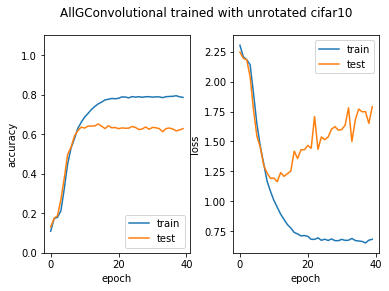

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 196/196)  ==stats==> loss:   2.17, accuracy:  0.186, Time:  0:00:44


Test => Loss: 2.1391, Accuracy: 20.69% (2069/10000)


Epoch 2: 100% (batch 196/196)  ==stats==> loss:   2.01, accuracy:   0.26, Time:  0:00:44


Test => Loss: 1.9309, Accuracy: 30.75% (3075/10000)


Epoch 3: 100% (batch 196/196)  ==stats==> loss:   1.87, accuracy:  0.327, Time:  0:00:44


Test => Loss: 1.8185, Accuracy: 35.65% (3565/10000)


Epoch 4: 100% (batch 196/196)  ==stats==> loss:   1.74, accuracy:  0.391, Time:  0:00:44


Test => Loss: 1.6634, Accuracy: 42.61% (4261/10000)


Epoch 5: 100% (batch 196/196)  ==stats==> loss:   1.59, accuracy:  0.457, Time:  0:00:44


Test => Loss: 1.4864, Accuracy: 49.25% (4925/10000)


Epoch 6: 100% (batch 196/196)  ==stats==> loss:   1.45, accuracy:  0.511, Time:  0:00:44


Test => Loss: 1.4700, Accuracy: 50.34% (5034/10000)


Epoch 7: 100% (batch 196/196)  ==stats==> loss:   1.36, accuracy:  0.545, Time:  0:00:44


Test => Loss: 1.3365, Accuracy: 55.85% (5585/10000)


Epoch 8: 100% (batch 196/196)  ==stats==> loss:   1.28, accuracy:  0.577, Time:  0:00:44


Test => Loss: 1.2808, Accuracy: 57.84% (5784/10000)


Epoch 9: 100% (batch 196/196)  ==stats==> loss:   1.21, accuracy:    0.6, Time:  0:00:44


Test => Loss: 1.2206, Accuracy: 60.21% (6021/10000)


Epoch 10: 100% (batch 196/196)  ==stats==> loss:   1.17, accuracy:  0.619, Time:  0:00:44


Test => Loss: 1.1679, Accuracy: 61.65% (6165/10000)


Epoch 11: 100% (batch 196/196)  ==stats==> loss:   1.12, accuracy:  0.633, Time:  0:00:44


Test => Loss: 1.1332, Accuracy: 62.89% (6289/10000)


Epoch 12: 100% (batch 196/196)  ==stats==> loss:   1.07, accuracy:   0.65, Time:  0:00:44


Test => Loss: 1.1370, Accuracy: 63.07% (6307/10000)


Epoch 13: 100% (batch 196/196)  ==stats==> loss:   1.04, accuracy:  0.661, Time:  0:00:44


Test => Loss: 1.1098, Accuracy: 64.19% (6419/10000)


Epoch 14: 100% (batch 196/196)  ==stats==> loss:   1.02, accuracy:  0.668, Time:  0:00:44


Test => Loss: 1.0657, Accuracy: 65.11% (6511/10000)


Epoch 15: 100% (batch 196/196)  ==stats==> loss:  0.984, accuracy:  0.679, Time:  0:00:44


Test => Loss: 1.0344, Accuracy: 66.52% (6652/10000)


Epoch 16: 100% (batch 196/196)  ==stats==> loss:  0.969, accuracy:  0.685, Time:  0:00:44


Test => Loss: 1.0469, Accuracy: 66.30% (6630/10000)


Epoch 17: 100% (batch 196/196)  ==stats==> loss:  0.943, accuracy:  0.694, Time:  0:00:44


Test => Loss: 1.0291, Accuracy: 67.26% (6726/10000)


Epoch 18: 100% (batch 196/196)  ==stats==> loss:  0.915, accuracy:  0.702, Time:  0:00:44


Test => Loss: 1.0176, Accuracy: 67.00% (6700/10000)


Epoch 19: 100% (batch 196/196)  ==stats==> loss:  0.892, accuracy:  0.709, Time:  0:00:44


Test => Loss: 1.0220, Accuracy: 66.58% (6658/10000)


Epoch 20: 100% (batch 196/196)  ==stats==> loss:  0.889, accuracy:   0.71, Time:  0:00:44


Test => Loss: 1.0024, Accuracy: 67.67% (6767/10000)


Epoch 21: 100% (batch 196/196)  ==stats==> loss:  0.857, accuracy:  0.721, Time:  0:00:44


Test => Loss: 0.9905, Accuracy: 67.95% (6795/10000)


Epoch 22: 100% (batch 196/196)  ==stats==> loss:  0.856, accuracy:  0.722, Time:  0:00:44


Test => Loss: 0.9760, Accuracy: 68.36% (6836/10000)


Epoch 23: 100% (batch 196/196)  ==stats==> loss:  0.831, accuracy:  0.729, Time:  0:00:44


Test => Loss: 0.9730, Accuracy: 68.72% (6872/10000)


Epoch 24: 100% (batch 196/196)  ==stats==> loss:  0.828, accuracy:   0.73, Time:  0:00:44


Test => Loss: 1.0044, Accuracy: 67.25% (6725/10000)


Epoch 25: 100% (batch 196/196)  ==stats==> loss:  0.807, accuracy:  0.737, Time:  0:00:44


Test => Loss: 1.0159, Accuracy: 67.02% (6702/10000)


Epoch 26: 100% (batch 196/196)  ==stats==> loss:  0.791, accuracy:  0.743, Time:  0:00:44


Test => Loss: 0.9579, Accuracy: 68.63% (6863/10000)


Epoch 27: 100% (batch 196/196)  ==stats==> loss:   0.78, accuracy:  0.745, Time:  0:00:44


Test => Loss: 0.9584, Accuracy: 69.01% (6901/10000)


Epoch 28: 100% (batch 196/196)  ==stats==> loss:  0.762, accuracy:  0.753, Time:  0:00:44


Test => Loss: 0.9670, Accuracy: 69.10% (6910/10000)


Epoch 29: 100% (batch 196/196)  ==stats==> loss:  0.757, accuracy:  0.753, Time:  0:00:44


Test => Loss: 0.9449, Accuracy: 70.36% (7036/10000)


Epoch 30: 100% (batch 196/196)  ==stats==> loss:  0.743, accuracy:  0.757, Time:  0:00:44


Test => Loss: 0.9861, Accuracy: 69.36% (6936/10000)


Epoch 31: 100% (batch 196/196)  ==stats==> loss:   0.73, accuracy:   0.76, Time:  0:00:44


Test => Loss: 0.9416, Accuracy: 70.11% (7011/10000)


Epoch 32: 100% (batch 196/196)  ==stats==> loss:  0.725, accuracy:  0.762, Time:  0:00:44


Test => Loss: 0.9439, Accuracy: 69.90% (6990/10000)


Epoch 33: 100% (batch 196/196)  ==stats==> loss:  0.719, accuracy:  0.764, Time:  0:00:44


Test => Loss: 0.9816, Accuracy: 70.35% (7035/10000)


Epoch 34: 100% (batch 196/196)  ==stats==> loss:  0.708, accuracy:  0.767, Time:  0:00:44


Test => Loss: 0.9481, Accuracy: 69.63% (6963/10000)


Epoch 35: 100% (batch 196/196)  ==stats==> loss:  0.716, accuracy:  0.765, Time:  0:00:44


Test => Loss: 0.9478, Accuracy: 69.91% (6991/10000)


Epoch 36: 100% (batch 196/196)  ==stats==> loss:  0.685, accuracy:  0.775, Time:  0:00:44


Test => Loss: 0.9354, Accuracy: 70.45% (7045/10000)


Epoch 37: 100% (batch 196/196)  ==stats==> loss:  0.685, accuracy:  0.775, Time:  0:00:44


Test => Loss: 0.9755, Accuracy: 70.37% (7037/10000)


Epoch 38: 100% (batch 196/196)  ==stats==> loss:  0.673, accuracy:  0.779, Time:  0:00:44


Test => Loss: 0.9616, Accuracy: 70.46% (7046/10000)


Epoch 39: 100% (batch 196/196)  ==stats==> loss:  0.664, accuracy:  0.781, Time:  0:00:44


Test => Loss: 1.0102, Accuracy: 68.79% (6879/10000)


Epoch 40: 100% (batch 196/196)  ==stats==> loss:  0.658, accuracy:  0.784, Time:  0:00:44


Test => Loss: 0.9336, Accuracy: 70.71% (7071/10000)


Epoch 41: 100% (batch 196/196)  ==stats==> loss:   0.66, accuracy:  0.781, Time:  0:00:44


Test => Loss: 0.9659, Accuracy: 70.79% (7079/10000)


Epoch 42: 100% (batch 196/196)  ==stats==> loss:   0.65, accuracy:  0.785, Time:  0:00:44


Test => Loss: 0.9828, Accuracy: 70.94% (7094/10000)


Epoch 43: 100% (batch 196/196)  ==stats==> loss:  0.633, accuracy:  0.791, Time:  0:00:44


Test => Loss: 0.9376, Accuracy: 70.32% (7032/10000)


Epoch 44: 100% (batch 196/196)  ==stats==> loss:  0.628, accuracy:  0.794, Time:  0:00:44


Test => Loss: 0.9513, Accuracy: 70.33% (7033/10000)


Epoch 45: 100% (batch 196/196)  ==stats==> loss:  0.628, accuracy:  0.793, Time:  0:00:44


Test => Loss: 0.9612, Accuracy: 70.50% (7050/10000)


Epoch 46: 100% (batch 196/196)  ==stats==> loss:  0.617, accuracy:  0.797, Time:  0:00:44


Test => Loss: 0.9514, Accuracy: 70.63% (7063/10000)


Epoch 47: 100% (batch 196/196)  ==stats==> loss:  0.613, accuracy:  0.797, Time:  0:00:44


Test => Loss: 0.9837, Accuracy: 69.11% (6911/10000)


Epoch 48: 100% (batch 196/196)  ==stats==> loss:  0.604, accuracy:    0.8, Time:  0:00:44


Test => Loss: 0.9611, Accuracy: 70.47% (7047/10000)


Epoch 49: 100% (batch 196/196)  ==stats==> loss:  0.597, accuracy:  0.802, Time:  0:00:44


Test => Loss: 0.9630, Accuracy: 70.07% (7007/10000)


Epoch 50: 100% (batch 196/196)  ==stats==> loss:  0.602, accuracy:    0.8, Time:  0:00:44


Test => Loss: 0.9491, Accuracy: 69.89% (6989/10000)


Epoch 51: 100% (batch 196/196)  ==stats==> loss:  0.587, accuracy:  0.805, Time:  0:00:44


Test => Loss: 1.0054, Accuracy: 69.86% (6986/10000)


Epoch 52: 100% (batch 196/196)  ==stats==> loss:  0.583, accuracy:  0.808, Time:  0:00:44


Test => Loss: 1.0059, Accuracy: 69.38% (6938/10000)


Epoch 53: 100% (batch 196/196)  ==stats==> loss:  0.584, accuracy:  0.806, Time:  0:00:44


Test => Loss: 0.9821, Accuracy: 70.68% (7068/10000)


Epoch 54: 100% (batch 196/196)  ==stats==> loss:  0.581, accuracy:  0.808, Time:  0:00:44


Test => Loss: 0.9800, Accuracy: 70.86% (7086/10000)


Epoch 55: 100% (batch 196/196)  ==stats==> loss:  0.583, accuracy:  0.807, Time:  0:00:44


Test => Loss: 1.0059, Accuracy: 69.87% (6987/10000)


Epoch 56: 100% (batch 196/196)  ==stats==> loss:   0.57, accuracy:  0.809, Time:  0:00:44


Test => Loss: 0.9703, Accuracy: 70.74% (7074/10000)


Epoch 57: 100% (batch 196/196)  ==stats==> loss:  0.571, accuracy:  0.811, Time:  0:00:44


Test => Loss: 0.9398, Accuracy: 70.67% (7067/10000)


Epoch 58: 100% (batch 196/196)  ==stats==> loss:   0.56, accuracy:  0.813, Time:  0:00:44


Test => Loss: 0.9590, Accuracy: 70.65% (7065/10000)


Epoch 59: 100% (batch 196/196)  ==stats==> loss:  0.557, accuracy:  0.814, Time:  0:00:44


Test => Loss: 0.9502, Accuracy: 70.78% (7078/10000)


Epoch 60: 100% (batch 196/196)  ==stats==> loss:   0.55, accuracy:  0.817, Time:  0:00:44


Test => Loss: 1.0031, Accuracy: 71.53% (7153/10000)


Epoch 61: 100% (batch 196/196)  ==stats==> loss:  0.553, accuracy:  0.816, Time:  0:00:44


Test => Loss: 0.9937, Accuracy: 70.48% (7048/10000)


Epoch 62: 100% (batch 196/196)  ==stats==> loss:  0.541, accuracy:  0.819, Time:  0:00:44


Test => Loss: 1.0233, Accuracy: 71.09% (7109/10000)


Epoch 63: 100% (batch 196/196)  ==stats==> loss:  0.543, accuracy:  0.818, Time:  0:00:44


Test => Loss: 0.9905, Accuracy: 71.02% (7102/10000)


Epoch 64: 100% (batch 196/196)  ==stats==> loss:  0.544, accuracy:  0.818, Time:  0:00:44


Test => Loss: 1.0180, Accuracy: 70.73% (7073/10000)


Epoch 65: 100% (batch 196/196)  ==stats==> loss:  0.539, accuracy:  0.818, Time:  0:00:44


Test => Loss: 0.9785, Accuracy: 70.88% (7088/10000)


Epoch 66: 100% (batch 196/196)  ==stats==> loss:  0.538, accuracy:   0.82, Time:  0:00:44


Test => Loss: 0.9901, Accuracy: 70.87% (7087/10000)


Epoch 67: 100% (batch 196/196)  ==stats==> loss:  0.523, accuracy:  0.823, Time:  0:00:44


Test => Loss: 0.9771, Accuracy: 71.09% (7109/10000)


Epoch 68: 100% (batch 196/196)  ==stats==> loss:  0.527, accuracy:  0.823, Time:  0:00:44


Test => Loss: 0.9896, Accuracy: 71.25% (7125/10000)


Epoch 69: 100% (batch 196/196)  ==stats==> loss:  0.522, accuracy:  0.824, Time:  0:00:44


Test => Loss: 1.0142, Accuracy: 70.50% (7050/10000)


Epoch 70: 100% (batch 196/196)  ==stats==> loss:  0.528, accuracy:  0.824, Time:  0:00:44


Test => Loss: 1.0099, Accuracy: 70.40% (7040/10000)


Epoch 71: 100% (batch 196/196)  ==stats==> loss:  0.521, accuracy:  0.824, Time:  0:00:44


Test => Loss: 1.0102, Accuracy: 70.66% (7066/10000)


Epoch 72: 100% (batch 196/196)  ==stats==> loss:  0.513, accuracy:  0.827, Time:  0:00:44


Test => Loss: 0.9856, Accuracy: 71.14% (7114/10000)


Epoch 73: 100% (batch 196/196)  ==stats==> loss:  0.505, accuracy:   0.83, Time:  0:00:44


Test => Loss: 0.9670, Accuracy: 71.33% (7133/10000)


Epoch 74: 100% (batch 196/196)  ==stats==> loss:  0.509, accuracy:  0.828, Time:  0:00:44


Test => Loss: 1.0178, Accuracy: 71.04% (7104/10000)


Epoch 75: 100% (batch 196/196)  ==stats==> loss:  0.513, accuracy:  0.828, Time:  0:00:44


Test => Loss: 1.0111, Accuracy: 70.14% (7014/10000)


Epoch 76: 100% (batch 196/196)  ==stats==> loss:  0.515, accuracy:  0.827, Time:  0:00:44


Test => Loss: 1.0111, Accuracy: 71.94% (7194/10000)


Epoch 77: 100% (batch 196/196)  ==stats==> loss:  0.505, accuracy:  0.831, Time:  0:00:44


Test => Loss: 1.0217, Accuracy: 71.09% (7109/10000)


Epoch 78: 100% (batch 196/196)  ==stats==> loss:  0.491, accuracy:  0.833, Time:  0:00:44


Test => Loss: 0.9746, Accuracy: 71.41% (7141/10000)


Epoch 79: 100% (batch 196/196)  ==stats==> loss:    0.5, accuracy:  0.832, Time:  0:00:44


Test => Loss: 1.0576, Accuracy: 69.96% (6996/10000)


Epoch 80: 100% (batch 196/196)  ==stats==> loss:  0.507, accuracy:  0.829, Time:  0:00:44


Test => Loss: 1.0086, Accuracy: 71.70% (7170/10000)


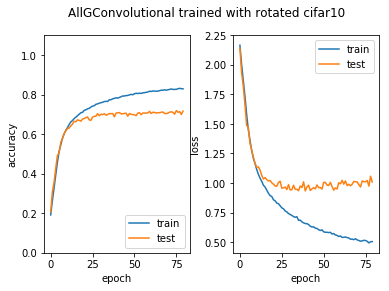

Testing both models on both datasets...


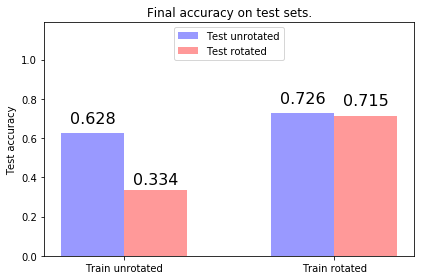

model_rotated_test_dataset score: loss=2.358929, accuracy=0.333700
model_rotated_train_dataset score: loss=2.306610, accuracy=0.347200
model_test_dataset score: loss=1.790933, accuracy=0.628200
model_train_dataset score: loss=0.657878, accuracy=0.792380
rotated_model_rotated_test_dataset score: loss=1.011859, accuracy=0.715300
rotated_model_rotated_train_dataset score: loss=0.467591, accuracy=0.840980
rotated_model_test_dataset score: loss=0.976991, accuracy=0.726300
rotated_model_train_dataset score: loss=0.439562, accuracy=0.849220


In [6]:
import pytorch_experiment
batch_size = 256

epochs={'cifar10':40,'mnist':20,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':15,'mnist_rot':10,'pugeault':15}

rotated_epochs={'cifar10':80,'mnist':45,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':15,'pugeault':40}

config=pytorch_experiment.TrainRotatedConfig(dataset_name=dataset,batch_size=batch_size,
                   epochs=epochs[dataset],rotated_epochs=rotated_epochs[dataset],
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=pytorch_experiment.train_rotated(config,model,rotated_model,
                                        x_train,y_train,x_test,y_test,plot_accuracy=True)


for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


In [ ]:
from datetime import datetime

output_file="results/all_gconv.txt"
f= open(output_file,"a+")
general_message="%s\nResults on dataset %s with model %s and rotated model %s\n" % (str(datetime.now()),dataset,model.name,rotated_model.name)
f.write(general_message)
print(general_message)
for k,v in scores.items():
    message='%s score: loss=%f, accuracy=%f\n' % (k,v[0],v[1])
    print(message)
    f.write(message)
f.write("\nConfig:",str(config))    
f.write("\n\n")    
f.close()